In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
from statistics import mode
from helper_functions import energy_name

In [2]:
%matplotlib inline
plt.rcParams['font.size'] = 12 # use for subfigure

In [3]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "compare_MUSIC"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [4]:
df_moliere = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final.hdf5')
df_moliere

FileNotFoundError: File data/compare_MUSIC/MUSIC_2TeV_3km_water_final.hdf5 does not exist

In [ ]:
E_i = df_moliere.E_i[0] * 1e3 # in MeV
E_f = mode(df_moliere.E_f) * 1e3 # in MeV 
n_events = len(df_moliere)

In [ ]:
df_highland = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_highland.hdf5')

In [49]:
df_GEANT4_moliere = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_GEANT4.hdf5')

In [50]:
df_GEANT4_highland = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_GEANT4_highland.hdf5')

In [51]:
df_MUSIC = pd.read_csv('data/compare_MUSIC/MUSIC_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')

In [52]:
df_GEANT4 = pd.read_csv('data/compare_MUSIC/Geant4_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')

In [53]:
df_GEANT4_angle = pd.read_csv('data/compare_MUSIC/GEANT4_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')

In [54]:
df_MUSIC_angle = pd.read_csv('data/compare_MUSIC/MUSIC_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')

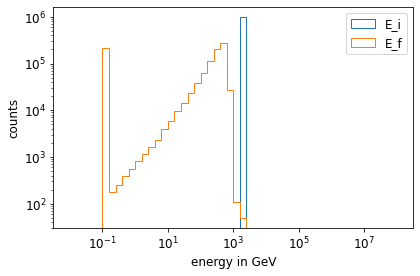

In [55]:
# energy
bins = np.logspace(-2, 8, 51)

plt.hist(df_moliere.E_i, bins=bins, histtype='step', label='E_i')
plt.hist(df_moliere.E_f, bins=bins, histtype='step', label='E_f')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy in GeV')
plt.ylabel('counts')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_energy_distribution.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

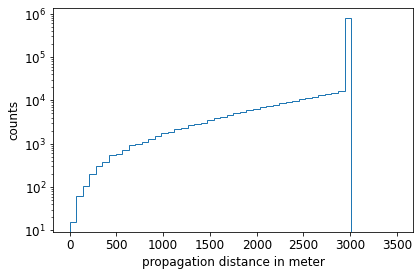

In [56]:
# propagation distance
bins = np.linspace(0, 3500, 51)

plt.hist(df_moliere.distances, bins=bins, histtype='step')
plt.yscale('log')
# plt.xscale('log')
plt.ylabel('counts')
plt.xlabel('propagation distance in meter')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_prop_dist.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

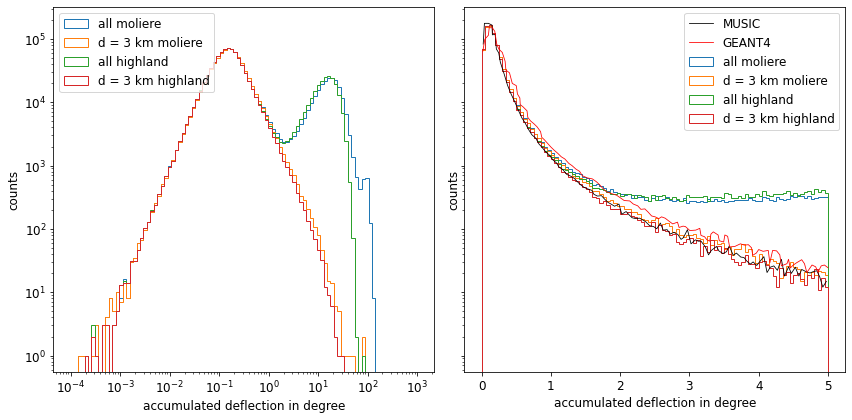

In [57]:
# Deflection
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

bins = np.logspace(-4, 3, 101)
ax[0].hist(df_moliere.deflection, bins=bins, histtype='step', label='all moliere')
ax[0].hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='d = 3 km moliere')

ax[0].hist(df_highland.deflection, bins=bins, histtype='step', label='all highland')
ax[0].hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='d = 3 km highland')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('accumulated deflection in degree')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper left')

bins = np.linspace(0, 5, 101)
ax[1].hist(df_moliere.deflection, bins=bins, histtype='step', label='all moliere')
ax[1].hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='d = 3 km moliere')

ax[1].hist(df_highland.deflection, bins=bins, histtype='step', label='all highland')
ax[1].hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='d = 3 km highland')
ax[1].set_yscale('log')
ax[1].set_xlabel('accumulated deflection in degree')
ax[1].set_ylabel('counts')


ax[1].plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
ax[1].plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='GEANT4')

ax[1].legend(loc='upper right')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_accumulated_defl.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

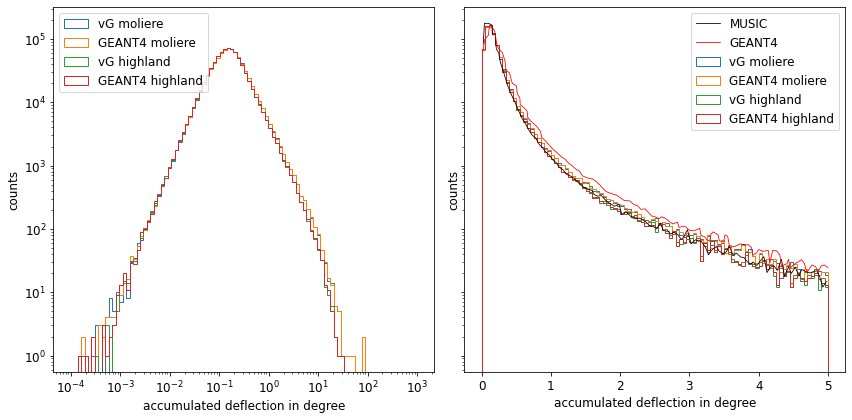

In [58]:
# Deflection
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

bins = np.logspace(-4, 3, 101)
ax[0].hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
ax[0].hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
ax[0].hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
ax[0].hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', label='GEANT4 highland')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('accumulated deflection in degree')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper left')

bins = np.linspace(0, 5, 101)
ax[1].hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
ax[1].hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
ax[1].hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
ax[1].hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', label='GEANT4 highland')

ax[1].set_yscale('log')
ax[1].set_xlabel('accumulated deflection in degree')
ax[1].set_ylabel('counts')


ax[1].plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
ax[1].plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='GEANT4')

ax[1].legend(loc='upper right')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_accumulated_defl_only3km.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

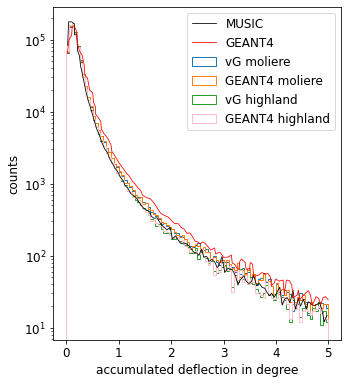

In [59]:
# Deflection

plt.figure(figsize=(5, 5.5))

bins = np.linspace(0, 5, 101)
plt.hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
plt.hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
plt.hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
plt.hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', color="pink", label='GEANT4 highland')

plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')


plt.plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
plt.plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='GEANT4')

plt.legend(loc='upper right')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_accumulated_defl_only3km_5deg.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

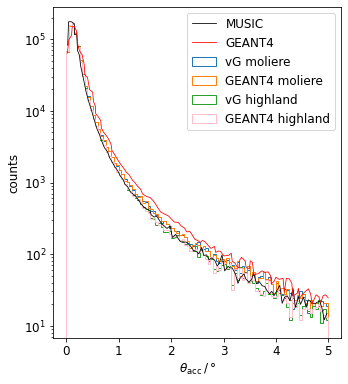

In [60]:
# Deflection

plt.figure(figsize=(5, 5.5))

bins = np.linspace(0, 5, 101)
plt.hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
plt.hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
plt.hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
plt.hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', color="pink", label='GEANT4 highland')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.ylabel('counts')


plt.plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
plt.plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='GEANT4')

plt.legend(loc='upper right')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_accumulated_defl_only3km_5deg_paper.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

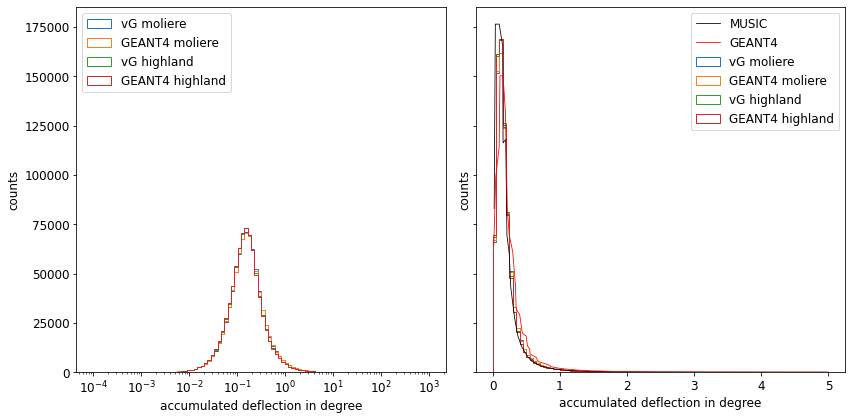

In [61]:
# Deflection
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

bins = np.logspace(-4, 3, 101)
ax[0].hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
ax[0].hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
ax[0].hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
ax[0].hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', label='GEANT4 highland')

ax[0].set_xscale('log')
# ax[0].set_yscale('log')
ax[0].set_xlabel('accumulated deflection in degree')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper left')

bins = np.linspace(0, 5, 101)
ax[1].hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
ax[1].hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
ax[1].hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
ax[1].hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', label='GEANT4 highland')

# ax[1].set_yscale('log')
ax[1].set_xlabel('accumulated deflection in degree')
ax[1].set_ylabel('counts')


ax[1].plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
ax[1].plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='GEANT4')

ax[1].legend(loc='upper right')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_accumulated_defl_only3km_nologscale.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

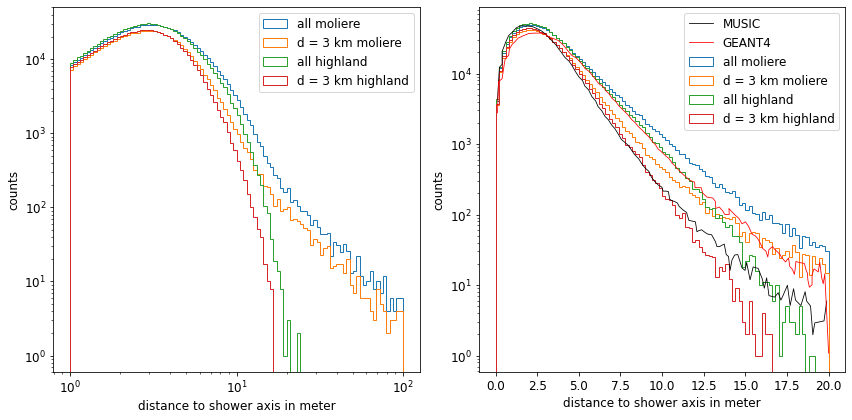

In [62]:
# Distance to shower axis 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

d_shower_moliere = np.sqrt(df_moliere.x_f**2 + df_moliere.y_f**2) / 1e2 # in meter
d_shower_highland = np.sqrt(df_highland.x_f**2 + df_highland.y_f**2) / 1e2 # in meter

bins = np.logspace(0, 2, 101)
ax[0].hist(d_shower_moliere, bins=bins, histtype='step', label='all moliere')
ax[0].hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='d = 3 km moliere')
ax[0].hist(d_shower_highland, bins=bins, histtype='step', label='all highland')
ax[0].hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='d = 3 km highland')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('distance to shower axis in meter')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper right')

bins = np.linspace(0, 20, 101)
ax[1].hist(d_shower_moliere, bins=bins, histtype='step', label='all moliere')
ax[1].hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='d = 3 km moliere')
ax[1].hist(d_shower_highland, bins=bins, histtype='step', label='all highland')
ax[1].hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='d = 3 km highland')
ax[1].set_yscale('log')
ax[1].set_xlabel('distance to shower axis in meter')
ax[1].set_ylabel('counts')


ax[1].plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8, label='MUSIC')
ax[1].plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8, label='GEANT4')

ax[1].legend(loc='upper right')                   


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

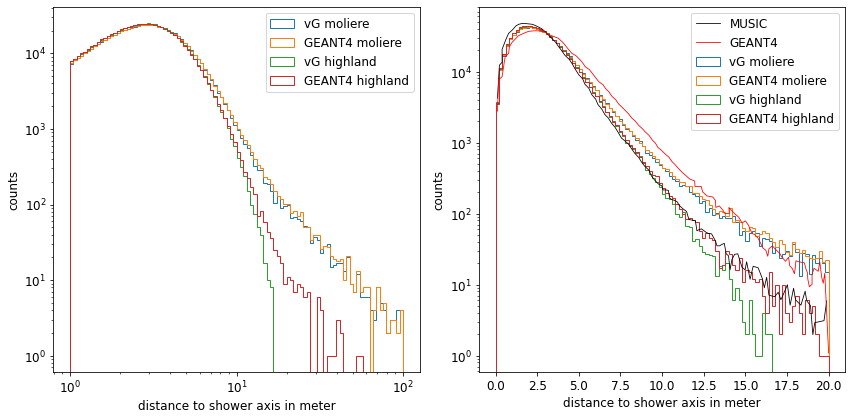

In [63]:
# Distance to shower axis 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

d_shower_moliere = np.sqrt(df_moliere.x_f**2 + df_moliere.y_f**2) / 1e2 # in meter
d_shower_GEANT4_moliere = np.sqrt(df_GEANT4_moliere.x_f**2 + df_GEANT4_moliere.y_f**2) / 1e2 # in meter
d_shower_highland = np.sqrt(df_highland.x_f**2 + df_highland.y_f**2) / 1e2 # in meter
d_shower_GEANT4_highland = np.sqrt(df_GEANT4_highland.x_f**2 + df_GEANT4_highland.y_f**2) / 1e2 # in meter

bins = np.logspace(0, 2, 101)
ax[0].hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
ax[0].hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
ax[0].hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
ax[0].hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', label='GEANT4 highland')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('distance to shower axis in meter')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper right')

bins = np.linspace(0, 20, 101)
ax[1].hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
ax[1].hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
ax[1].hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
ax[1].hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', label='GEANT4 highland')

ax[1].set_yscale('log')
ax[1].set_xlabel('distance to shower axis in meter')
ax[1].set_ylabel('counts')


ax[1].plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8, label='MUSIC')
ax[1].plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8, label='GEANT4')

ax[1].legend(loc='upper right')                   


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis_only3km.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

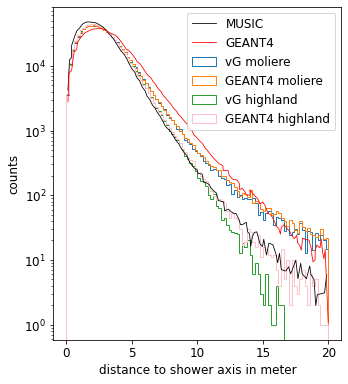

In [64]:
# Distance to shower axis 

plt.figure(figsize=(5, 5.5))

d_shower_moliere = np.sqrt(df_moliere.x_f**2 + df_moliere.y_f**2) / 1e2 # in meter
d_shower_GEANT4_moliere = np.sqrt(df_GEANT4_moliere.x_f**2 + df_GEANT4_moliere.y_f**2) / 1e2 # in meter
d_shower_highland = np.sqrt(df_highland.x_f**2 + df_highland.y_f**2) / 1e2 # in meter
d_shower_GEANT4_highland = np.sqrt(df_GEANT4_highland.x_f**2 + df_GEANT4_highland.y_f**2) / 1e2 # in meter

bins = np.linspace(0, 20, 101)
plt.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
plt.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
plt.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
plt.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step', label='GEANT4 highland')

plt.yscale('log')
plt.xlabel('distance to shower axis in meter')
plt.ylabel('counts')


plt.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8, label='MUSIC')
plt.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8, label='GEANT4')

plt.legend(loc='upper right')                   


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis_only3km_20m.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

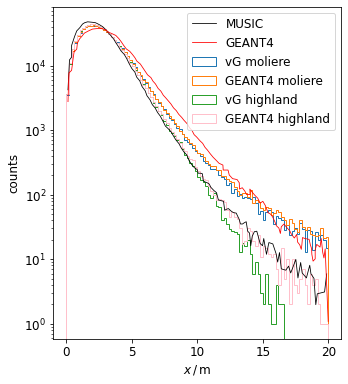

In [65]:
# Distance to shower axis 

plt.figure(figsize=(5, 5.5))

d_shower_moliere = np.sqrt(df_moliere.x_f**2 + df_moliere.y_f**2) / 1e2 # in meter
d_shower_GEANT4_moliere = np.sqrt(df_GEANT4_moliere.x_f**2 + df_GEANT4_moliere.y_f**2) / 1e2 # in meter
d_shower_highland = np.sqrt(df_highland.x_f**2 + df_highland.y_f**2) / 1e2 # in meter
d_shower_GEANT4_highland = np.sqrt(df_GEANT4_highland.x_f**2 + df_GEANT4_highland.y_f**2) / 1e2 # in meter

bins = np.linspace(0, 20, 101)
plt.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
plt.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
plt.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
plt.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step', label='GEANT4 highland')

plt.yscale('log')
plt.xlabel(r'$x\,/\,$m') 
plt.ylabel('counts')


plt.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8, label='MUSIC')
plt.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8, label='GEANT4')

plt.legend(loc='upper right')                   


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis_only3km_20m_paper.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

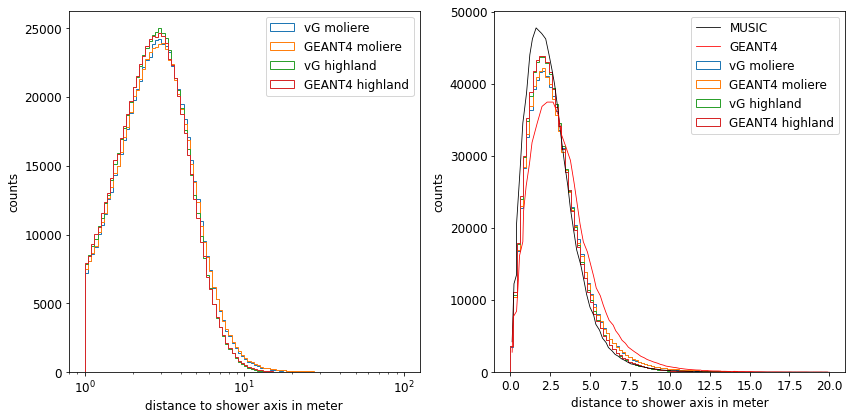

In [66]:
# Distance to shower axis 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

d_shower_moliere = np.sqrt(df_moliere.x_f**2 + df_moliere.y_f**2) / 1e2 # in meter
d_shower_GEANT4_moliere = np.sqrt(df_GEANT4_moliere.x_f**2 + df_GEANT4_moliere.y_f**2) / 1e2 # in meter
d_shower_highland = np.sqrt(df_highland.x_f**2 + df_highland.y_f**2) / 1e2 # in meter
d_shower_GEANT4_highland = np.sqrt(df_GEANT4_highland.x_f**2 + df_GEANT4_highland.y_f**2) / 1e2 # in meter

bins = np.logspace(0, 2, 101)
ax[0].hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
ax[0].hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
ax[0].hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
ax[0].hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', label='GEANT4 highland')

ax[0].set_xscale('log')
# ax[0].set_yscale('log')
ax[0].set_xlabel('distance to shower axis in meter')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper right')

bins = np.linspace(0, 20, 101)
ax[1].hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
ax[1].hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
ax[1].hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
ax[1].hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', label='GEANT4 highland')

# ax[1].set_yscale('log')
ax[1].set_xlabel('distance to shower axis in meter')
ax[1].set_ylabel('counts')


ax[1].plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8, label='MUSIC')
ax[1].plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8, label='GEANT4')

ax[1].legend(loc='upper right')                   


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis_only3km_nologscale.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

In [67]:
max(df_moliere.deflection)

137.48290968247514847

In [68]:
max(df_moliere.distances)

3000.0

In [69]:
# calculate mean and survival ratio to compare with paper
# 1. wie survival probability ausrechnen? len(df) / len(df.distances==3000)??

In [70]:
# survival probability with E_f = 10 MeV (muon mass)
surv_proposal_moliere = np.round(len(df_moliere[df_moliere.distances==3e3]) / len(df_moliere), 3)
surv_proposal_highland = np.round(len(df_highland[df_highland.distances==3e3]) / len(df_highland), 3)
surv_music = 0.779
surv_geant4 = 0.793

print('proposal moliere: ', surv_proposal_moliere)
print('proposal highland: ', surv_proposal_highland)
print('music: ', surv_music)
print('geant4: ', surv_geant4)

proposal moliere:  0.779
proposal highland:  0.779
music:  0.779
geant4:  0.793


In [71]:
# mean scattered angle in degree
mean_angle_proposal_moliere = np.round(np.mean(df_moliere.deflection[df_moliere.distances==3e3]), 2)
mean_angle_proposal_GEANT4_moliere = np.round(np.mean(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3]), 2)
mean_angle_proposal_highland = np.round(np.mean(df_highland.deflection[df_highland.distances==3e3]), 2)
mean_angle_proposal_GEANT4_highland = np.round(np.mean(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3]), 2)
mean_angle_music = 0.22 
mean_angle_geant4 = 0.27

print('proposal vG moliere: ', mean_angle_proposal_moliere, ' ± ', np.round(np.std(df_moliere.deflection[df_moliere.distances==3e3]), 2))
print('proposal GEANT4 moliere: ', mean_angle_proposal_GEANT4_moliere, ' ± ', np.round(np.std(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3]), 2))
print('proposal vG highland: ', mean_angle_proposal_highland, ' ± ', np.round(np.std(df_highland.deflection[df_highland.distances==3e3]), 2))
print('proposal GEANT4 highland: ', mean_angle_proposal_GEANT4_highland, ' ± ', np.round(np.std(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3]), 2))
print('music: ', mean_angle_music)
print('geant4: ', mean_angle_geant4)

proposal vG moliere:  0.24  ±  0.45
proposal GEANT4 moliere:  0.24  ±  0.45
proposal vG highland:  0.22  ±  0.35
proposal GEANT4 highland:  0.22  ±  0.35
music:  0.22
geant4:  0.27


In [72]:
# mean survived energy in GeV
mean_energy_proposal_moliere = np.round(np.mean(df_moliere.E_f[df_moliere.distances==3e3]), 0)
mean_energy_proposal_highland = np.round(np.mean(df_highland.E_f[df_highland.distances==3e3]), 0)
mean_energy_music = 323 
mean_energy_geant4 = 317

print('proposal moliere: ', mean_energy_proposal_moliere, ' ± ', np.round(np.std(df_moliere.E_f[df_moliere.distances==3e3]), 0))
print('proposal highland: ', mean_energy_proposal_highland, ' ± ', np.round(np.std(df_highland.E_f[df_highland.distances==3e3]), 0))
print('music: ', mean_energy_music)
print('geant4: ', mean_energy_geant4)

proposal moliere:  331.0  ±  178.0
proposal highland:  331.0  ±  178.0
music:  323
geant4:  317


In [73]:
# mean shower axis distance in meter
mean_dist_proposal_moliere = np.round(np.mean(d_shower_moliere[df_moliere.distances==3e3]), 1)
mean_dist_proposal_GEANT4_moliere = np.round(np.mean(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3]), 1)
mean_dist_proposal_highland = np.round(np.mean(d_shower_highland[df_highland.distances==3e3]), 1)
mean_dist_proposal_GEANT4_highland = np.round(np.mean(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3]), 1)
mean_dist_music = 2.6
mean_dist_geant4 = 3.3

print('proposal vG moliere: ', mean_dist_proposal_moliere, ' ± ', np.round(np.std(d_shower_moliere[df_moliere.distances==3e3]), 1))
print('proposal GEANT4 moliere: ', mean_dist_proposal_GEANT4_moliere, ' ± ', np.round(np.std(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3]), 1))
print('proposal vG highland: ', mean_dist_proposal_highland, ' ± ', np.round(np.std(d_shower_highland[df_highland.distances==3e3]), 1))
print('proposal GEANT4 highland: ', mean_dist_proposal_GEANT4_highland, ' ± ', np.round(np.std(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3]), 1))
print('music: ', mean_dist_music)
print('geant4: ', mean_dist_geant4)

proposal vG moliere:  2.9  ±  2.6
proposal GEANT4 moliere:  2.9  ±  2.6
proposal vG highland:  2.7  ±  1.6
proposal GEANT4 highland:  2.7  ±  1.7
music:  2.6
geant4:  3.3
